## Notes and Questions
- The metrics they use to select their model parameters are metrics for classification, will have to look more into the analogs in regression beyond the standard ones I've done in class
- how strictly to follow paper e.g. number trees in random forest

## ToDo
- use gridsearch instead of random grid search eventually


### Covariates in corruption paper 
1. private sector includes different measures of economic activity and sectoral distributions

- Average business establishments size based on employment, number of business establishments, payroll per employee, average business establishments payroll, share of business establishments entering, share of business establishments exiting, business establishments churning, share of private sector workers over population, Hirschman-Herfindahl index based on business establishments size, average growth in business establishments and in employment in past 3 years, share of business establishments below 5 employees, share of business establishments between 5 and 25 employees, share of business establishments above 25 employees, share of business establishments in construction, share of business establishments in retail, share of business establishments in services.

2. public sector features include the size, relative importance, and wages of public officials

- Share of public sector employees over population, average wage of public sector employees, share of public institutions opening,share of public institutions closing, public institutions churning, share of workers by position within the institution, average growth in public employment and public institutions in past 3 years, share of public sector employees from municipal institutions, number of public institutions, average public institution size based on employment.

3. financial development includes measures of credit-related variables from public and private banks

- Share of business establishments receiving public loans, number of public loans per business establishment, total public credit per business establishment, average interest rate in public lending, bank branches per capita, banks per capita, total private credit per capita, total deposits per capita, and Hirschman-Herfindahl index based on private banks total assets and based on private banks credit.

4. human capital includes measures of education and access to it

- Literacy rate, the share of population between 15 and 24 years old that finished, the first, second, and third cycle of primary education (Census), illiteracy rate (Census), average test scores in Portuguese and maths for nationwide tests at 4th and 8th grade, average private sector employees education, average private sector employees education by worker position within the firm, share of unqualified public employees based on job requirements, share of unqualified public employees by position within the institution, average public employees education, average public employees education by position within the institution, number of higher public education institutions per capita, number of higher private education institutions per capita.

5. public spending includes different types of spending as well as local procurement variables

- Total expenditures per capita, personnel expenditures per capita, budget surplus per capita, total revenue per capita, federal transfers of capital per capita, federal current transfers per capita, transfers from the national tax fund per capita, share of business establishments in the municipality with public procurement, number of contracts per business establishments, federal procurement expenditure over population, share of discretionary contracts, and share of competitive contracts.

6. local politics includes variables of political competition and alignment with the central government

- Number of candidates, Hirschman-Herfindahl index based on the vote shares, margin of victory between the winner and the runner-up, an indicator for whether the mayor is in his second term, an indicator for whether the mayor’s party is the same as the one of the governor, an indicator for whether the mayor’s party is from the same party as the one of the president, an indicator if the mayor is from right-wing party, an indicator if the mayor is from left-wing party, average candidate campaign donations and expenditures for firms and individuals, and per capita campaign donations and expenditures for firms and individuals.

7. local demographics

- Population density, GDP per capita, share of population living in rural areas (Census), deaths by aggression, GINI coefficient for income distribution (Census), average night light intensity coverage performing deblurring, inter-calibration, and geometric corrections, local radio, local newspapers, infant mortality rate, child mortality rate, average number of prenatal visits, share of abnormal births, share of underweight births, share of births with more than seven prenatal visits, and share of births with more than four prenatal visits.

8. natural resources’ dependency includes the relevance of different natural resources, and finally 
- Share of business establishments in agriculture and mining sector, share of production of each of the top-7 crops in the country multiplied by the the log change in international prices and share of value of production over GDP (as constructed in Bernstein et al., 2018). The crops included are sugar cane, oranges, soybeans, maize, rice, rice, banana, and wheat, covering more than 98% of total agricultural production.

### Covariates in deforestation
1. federal politics
- "lula": Lula government years (2003-2010),
- "dilma": Dilma government yeras (2011-2016),
- "temer": Temer interim government (2017-2018),
- "bolsonaro": Bolsonaro government (2019-2020),
- "fed_election_year": Years where there was a Federal Election 
- "new_forest_code": years after new forest code (post 2012), --? is this one sorted correctly

2. local politics includes variables of political competition and alignment with the central government
- "mun_election_year": municipal election year,


3. local demographics

- "populacao": Population (I think this is census data so 2000 and 2010),
- "pib_pc": GDP per capita,
- "indigenous_homol": pixel is inside an indigenous, homologated territory

4. natural resources and economy

- "ironore": whether the municipality produces ironore,
- "silver": whether the municipality produces silver,
- "copper": whether the municipality produces copper,
- "gold": whether the municipality produces gold,

- "soy_price": whether the municipality produces soy,
- "beef_price": whether the municipality produces beef,

- "ag_jobs": total employment in the agricultural sector,
- "mining_jobs": total employment in the mining sector,
- "public_jobs": total employment in the public sector,
- "construction_jobs": total employment in the construction sector


5. non-human related geographic variables
- "rain1": rainfall,
- "elevation": elevation (meters above sea level),
- "slope": slope,
- "aspect": aspect,
- "near_mines": distance to nearest mine,
- "near_roads": distance to nearest road,
- "near_hidrovia": distance to nearest hydroeletric,

## Models
- Random Forests
    - In this application, we keep fixed the number of fitted trees (500) and use cross-validation to determine the optimal number of features available in every node
- Gradient Boosting 
    - we keep fixed the learning rate (shrinkage parameter) and the minimum number of observations in the terminal nodes to avoid overfitting, and use cross-validation to determine the optimal number of trees and the interaction depth
- Neural Networks 
    - we keep fixed a logistic activation function and use cross-validation to determine the optimal number of units in the hidden layer (size) and the regularization parameter (decay)
- LASSO
    - The tuning parameter in the cross-validation is the weight of the penalization term in the objective function (λ), which is optimized over a grid of potential values
- Super Learner Ensemble
    - we use the Super Learner ensemble method developed by Polley et al. (2011), which finds an optimal combination of individual prediction models by minimizing the cross-validated out-of-bag risk of these predic- tions

## Protocol
- We divide our dataset into 70% as our training set and 30% as our testing set
- In our training set, we perform a 5-fold cross-validation procedure in order to train our models and choose the optimal combination of parameters
- The previous step is repeated 10 times with different random partitions. Hence, we obtain 10 “optimal parameters” and we use as our optimal parameter the average of them. For the case of integer parameters, we round it to the closest integer
- Using these optimal parameters, we assess the performance of our models in the testing set that has never been used for training purposes
- We standardize the data by the mean and standard deviation of the training set

## Assessing Models’ Performance
- We use as a first performance measure of interest the area under the ROC (Receiver Operating Characteristic) curve (AUC)
- We also present each model’s level of accuracy, which corresponds to the proportion of municipalities correctly predicted as corrupt; models’ precision, which is the proportion of positive identifications that are correct (or true positives over true positives plus false positives); models’ recall, which is the proportion of actual positives identified correctly (true positives over true positives plus false negatives), and models’ F1, which is the harmonic mean of precision and recall

In [127]:
#general
import pyreadr
import pandas as pd
import sklearn
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

#random forests
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

#gradient boosting
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

#plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Get Data

In [40]:
result = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/analysis.Rdata') #read R dataframe into Python
df1 = pd.DataFrame(result['forest_full'])
df = df1.sample(1000) #trim because this frame is quite large, test that all runs before doing entire dataset!

In [41]:
#some initial plots before we model

Text(0.5, 1.0, 'Year Histogram')

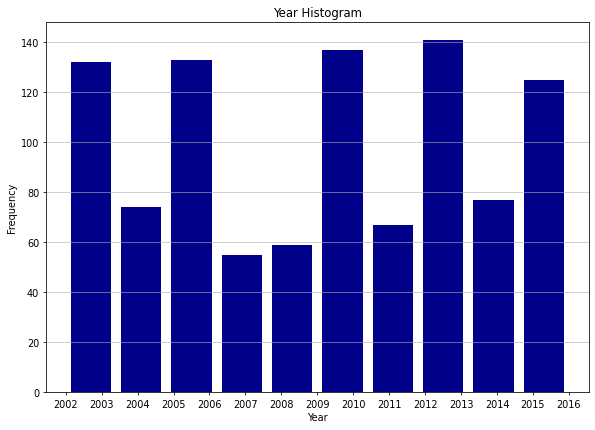

In [42]:
#look at distirbution by year of data
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['year'], color = 'darkblue', rwidth = 0.8)
plt.grid(axis = 'y', alpha = 0.75)
plt.xticks(np.unique(df['year']))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year Histogram')

Text(0.5, 1.0, 'Forest Loss (Response Variable) Histogram')

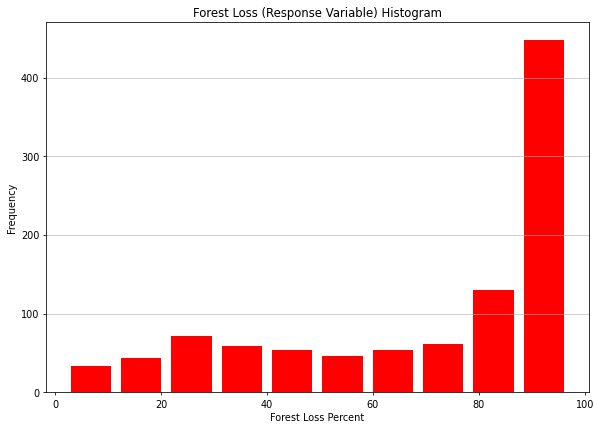

In [43]:
#look at distirbution of response variable, forest.l which represents forest loss of pixel (0-100)
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['forest.l'], color = 'red', rwidth = 0.8)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Forest Loss Percent')
plt.ylabel('Frequency')
plt.title('Forest Loss (Response Variable) Histogram')

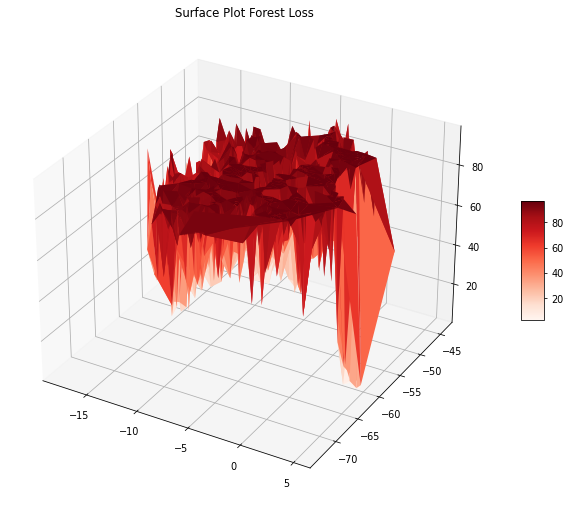

In [44]:
#forest loss 3d plot
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['forest.l'], cmap = plt.get_cmap('Reds'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Forest Loss')
 

plt.show()

Text(0.5, 1.0, 'Scatterplot Forest Loss')

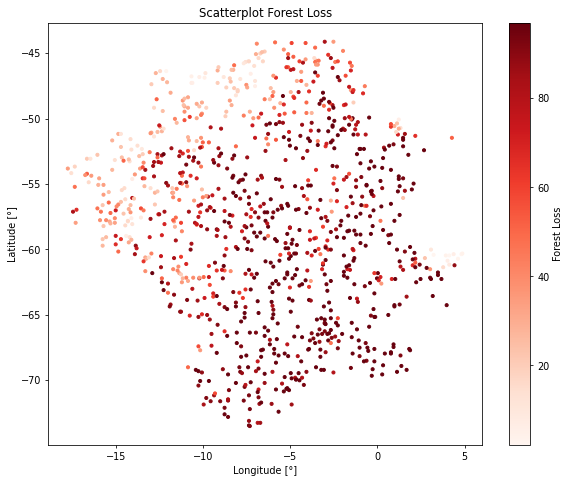

In [45]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['forest.l'], cmap = plt.get_cmap('Reds'))
plt.colorbar(label = 'Forest Loss')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Forest Loss')

In [46]:
#let's look at one predictor variable in our major categories

Text(0.5, 1.0, 'Near Mines Histogram')

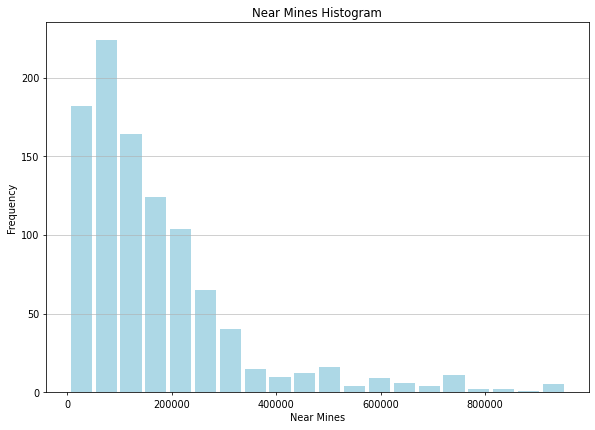

In [47]:
#distance to mines

#Near Mines scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['near_mines'], bins = 20, color = 'lightblue', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Near Mines')
plt.ylabel('Frequency')
plt.title('Near Mines Histogram')

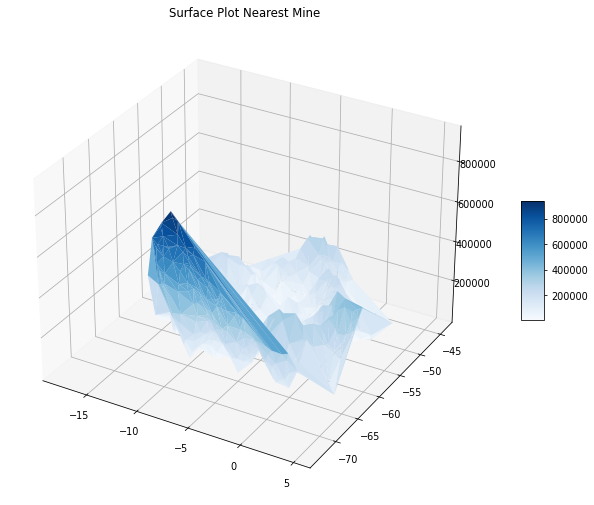

In [48]:
#Near mines
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['near_mines'], cmap = plt.get_cmap('Blues'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Nearest Mine')
 

plt.show()

Text(0.5, 1.0, 'Scatterplot Distance To Nearest Mine')

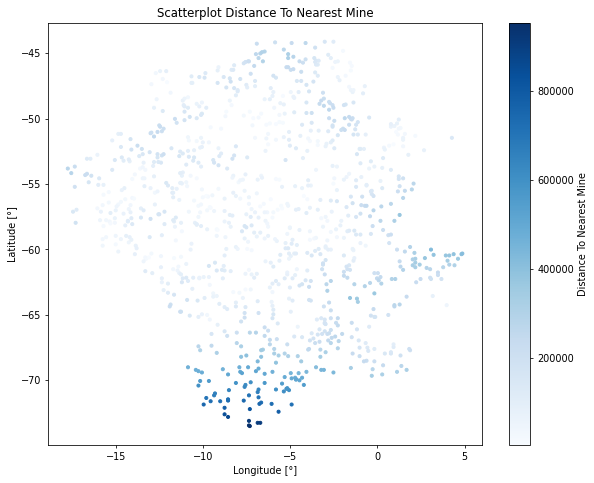

In [49]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['near_mines'], cmap = plt.get_cmap('Blues'))
plt.colorbar(label = 'Distance To Nearest Mine')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Distance To Nearest Mine')

Text(0.5, 1.0, 'Population Histogram')

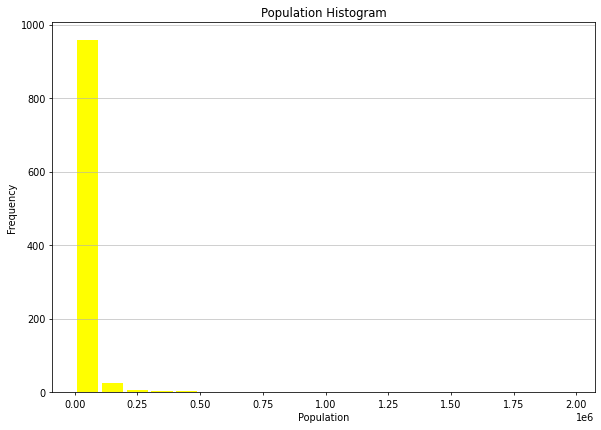

In [50]:
#Population scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['populacao'], bins = 20, color = 'yellow', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Histogram')

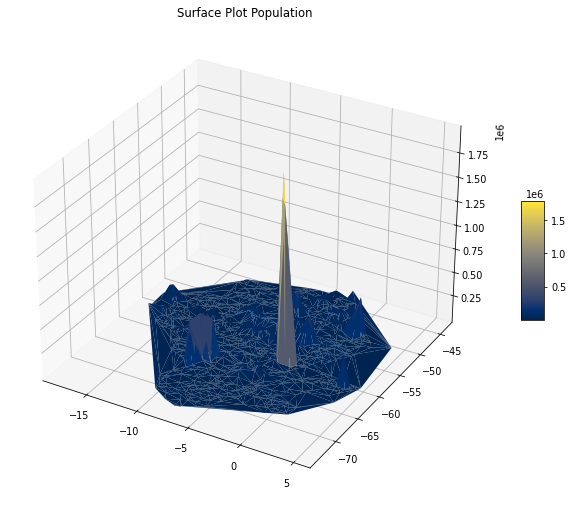

In [51]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['populacao'], cmap = plt.get_cmap('cividis'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Population')
plt.show()

Text(0.5, 1.0, 'Scatterplot Population')

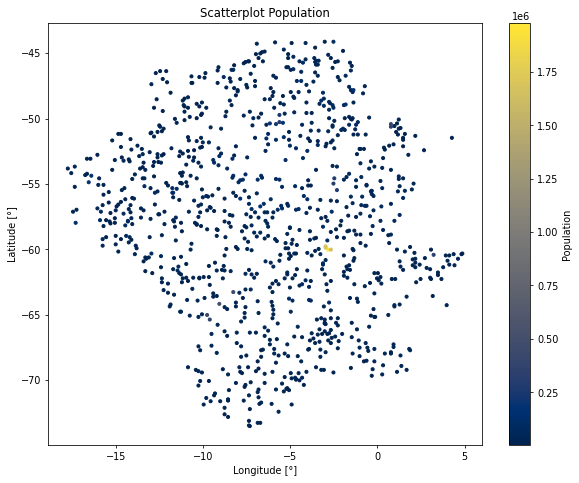

In [52]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['populacao'], cmap = plt.get_cmap('cividis'))
plt.colorbar(label = 'Population')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Population')

Text(0.5, 1.0, 'Agriculture Jobs Histogram')

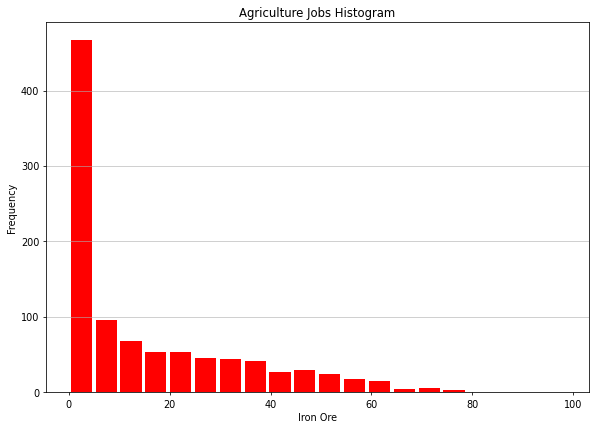

In [53]:
#agricultural jobs
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['ag_jobs'], bins = 20, color = 'red', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Iron Ore')
plt.ylabel('Frequency')
plt.title('Agriculture Jobs Histogram')

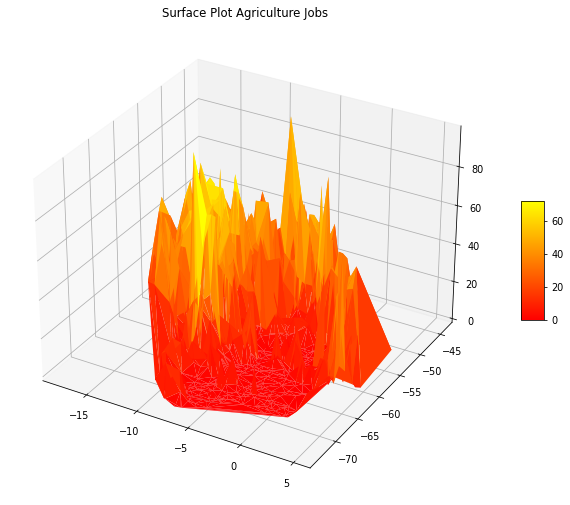

In [54]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['ag_jobs'], cmap = plt.get_cmap('autumn'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Agriculture Jobs')
plt.show()

Text(0.5, 1.0, 'Scatterplot Agriculture Jobs')

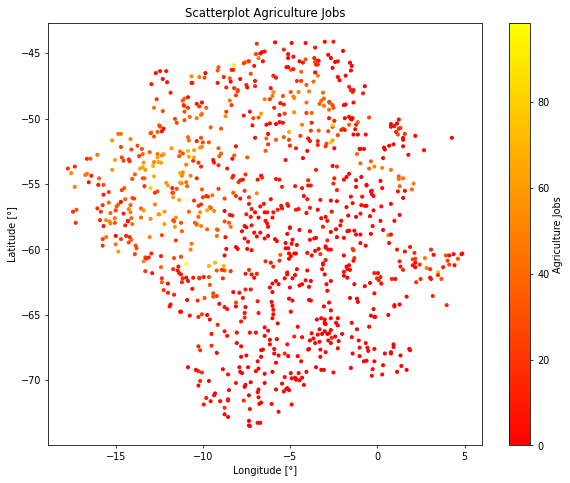

In [55]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['ag_jobs'], cmap = plt.get_cmap('autumn'))
plt.colorbar(label = 'Agriculture Jobs')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Agriculture Jobs')

## Random Forests

In [34]:
y = df['forest.l']
X = df.drop('forest.l', axis =1)

In [123]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.3) #30/70 data split

In [124]:
#normalize our explanatory variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

In [125]:
#use random search cross validation to tune model hyperparameters

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]

#create random grid, all poss combos of these variables
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [121]:
# Use the random grid to search for best hyperparameters

#create initial model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 1000 different combinations
#note that we're using r2 scoring here since the goal of the project is to explain deforestation
#todo: research additional scoring methods 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring = 'r2', cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
#let's see what the best parameters are
rf_random.best_params_

In [ ]:
#check how our best score did-- 93% best_score
rf_random.best_score_

In [103]:
def eval_model(model, test_features, test_labels):
    predictions = model.predict(test_features)
    
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
    print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
    print('Max Error:', metrics.max_error(test_labels, predictions))
    print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
    print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
    print('R^2:', metrics.r2_score(test_labels, predictions))
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))

In [95]:
def diff(previous, current):
    return ((float(current)-previous)/previous)*100

In [108]:
def eval_2_models(model1, model2, test_features, test_labels):
    
    predictions1 = model1.predict(test_features)
    predictions2 = model2.predict(test_features)
    
    print('% Diff Mean Absolute Error (MAE):', diff(metrics.mean_absolute_error(test_labels, predictions1), metrics.mean_absolute_error(test_labels, predictions2)))
    print('% Diff Mean Squared Error (MSE):', diff(metrics.mean_squared_error(test_labels, predictions1), metrics.mean_squared_error(test_labels, predictions2)))
    print('% Diff Root Mean Squared Error (RMSE):', diff(metrics.mean_squared_error(test_labels, predictions1, squared=False), metrics.mean_squared_error(test_labels, predictions2, squared=False)))
    print('% Diff Mean Absolute Percentage Error (MAPE):', diff(metrics.mean_absolute_percentage_error(test_labels, predictions1), metrics.mean_absolute_percentage_error(test_labels, predictions2)))
    print('% Diff Explained Variance Score:', diff(metrics.explained_variance_score(test_labels, predictions1), metrics.explained_variance_score(test_labels, predictions2)))
    print('% Diff Max Error:', diff(metrics.max_error(test_labels, predictions1), metrics.max_error(test_labels, predictions2)))
    print('% Diff Mean Squared Log Error:', diff(metrics.mean_squared_log_error(test_labels, predictions1), metrics.mean_squared_log_error(test_labels, predictions2)))
    print('% Diff Median Absolute Error:', diff(metrics.median_absolute_error(test_labels, predictions1), metrics.median_absolute_error(test_labels, predictions2)))
    print('% Diff R^2:', diff(metrics.r2_score(test_labels, predictions1), metrics.r2_score(test_labels, predictions2)))
    print('% Diff Mean Poisson Deviance:', diff(metrics.mean_poisson_deviance(test_labels, predictions1), metrics.mean_poisson_deviance(test_labels, predictions2)))
    print('% Diff Mean Gamma Deviance:', diff(metrics.mean_gamma_deviance(test_labels, predictions1), metrics.mean_gamma_deviance(test_labels, predictions2)))
    

In [114]:
#compare arbitrarily selected base model to our cv searched model 
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
best_random = rf_random.best_estimator_


In [115]:
eval_model(base_model, X_test, y_test)

Mean Absolute Error (MAE): 4.995
Mean Squared Error (MSE): 70.34609999999999
Root Mean Squared Error (RMSE): 8.387258193235736
Mean Absolute Percentage Error (MAPE): 0.11612568870702046
Explained Variance Score: 0.8983889541366903
Max Error: 46.8
Mean Squared Log Error: 0.03501559963441646
Median Absolute Error: 2.6500000000000004
R^2: 0.8982193941458704
Mean Poisson Deviance: 1.335302130253911
Mean Gamma Deviance: 0.03678371443902124


In [116]:
eval_model(best_random, X_test, y_test)

Mean Absolute Error (MAE): 4.705778612533574
Mean Squared Error (MSE): 65.52447390077549
Root Mean Squared Error (RMSE): 8.094718889546165
Mean Absolute Percentage Error (MAPE): 0.10943164092853354
Explained Variance Score: 0.9052950941275365
Max Error: 47.77939746193349
Mean Squared Log Error: 0.032713137875456114
Median Absolute Error: 2.4234456914001106
R^2: 0.9051955879303326
Mean Poisson Deviance: 1.2414281796141662
Mean Gamma Deviance: 0.03522045556342847


In [117]:
#compare the above
eval_2_models(base_model, best_random, X_test, y_test)

% Diff Mean Absolute Error (MAE): -5.790217967295825
% Diff Mean Squared Error (MSE): -6.854148416507103
% Diff Root Mean Squared Error (RMSE): -3.4879014923554137
% Diff Mean Absolute Percentage Error (MAPE): -5.764484889623073
% Diff Explained Variance Score: 0.768724944696442
% Diff Max Error: 2.0927296195160143
% Diff Mean Squared Log Error: -6.575531428847158
% Diff Median Absolute Error: -8.549219192448671
% Diff R^2: 0.7766692447223319
% Diff Mean Poisson Deviance: -7.0301655717342735
% Diff Mean Gamma Deviance: -4.249866821319218


In [ ]:
#n_estimators should be 500 as in the paper? 

In [120]:
rf_random.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_iter': 100,
 'n_jobs': -1,
 'param_distributions': {'n_estimators': [200,
   400,
   600,
   800,
   1000,
   1200,
   1400,
   1600,
   1800,
   2000],
  'max_features': ['auto', 'sqrt'],
  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf'

## Gradient Boosting

In [122]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [128]:
y = df['forest.l']
X = df.drop('forest.l', axis =1)

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.3) #30/70 data split

#normalize our explanatory variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

In [134]:
#use random search cross validation to tune model hyperparameters

# trade-off between learning_rate and n_estimators
learning_rate = [0.1, 0.2, 0.3]

# 
n_estimators = [80, 100, 200, 300]

# maximum number of levels in tree
criterion = ['friedman_mse', 'squared_error', 'mse', 'mae']

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


#create random grid, all poss combos of these variables
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}


In [135]:
# Use the random grid to search for best hyperparameters

#create initial model to tune
gbr = GradientBoostingRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 1000 different combinations
#note that we're using r2 scoring here since the goal of the project is to explain deforestation
#todo: research additional scoring methods 

gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, scoring = 'r2', cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
gbr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93308288 0.92875061 0.92936267 0.93475562        nan 0.93515757
 0.93462287        nan        nan 0.92969873        nan 0.92824008
 0.93069125 0.93495919 0.93571277        nan 0.93128572        nan
 0.93374753 0.93320158 0.92739072 0.92913888 0.93074211 0.93198197
        nan        nan 0.93340583 0.93354874 0.93246378 0.93401019
 0.93121539 0.93236527        nan 0.93521456 0.9293799  0.93424439
 0.92782749        nan 0.93332307 0.93155172 0.93540829        nan
 0.93516934 0.93470846 0.93549456        nan 0.92943028 0.93567824
 0.93458884 0.92821052 0.92873388        nan        nan 0.92747682
 0.92788302        nan 0.93053278        nan 0.9343068  0.93394316
        nan 0.93249855 0.93417605 0.93389782 0.93383577 0.93471476
 0.93329776 0.93450756        nan 0.93419518 0.93469657        nan
 0.93248121 0.93408101 0.93331174

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [80, 100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

In [137]:
#let's see what the best parameters are
gbr_random.best_params_

#check how our best score did-- 93% best_score
gbr_random.best_score_

0.9357127740138358

In [138]:
#compare arbitrarily selected base model to our cv searched model 
base_model = GradientBoostingRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
best_random = gbr_random.best_estimator_

In [139]:
eval_model(base_model, X_test, y_test)

Mean Absolute Error (MAE): 10.442795173478299
Mean Squared Error (MSE): 141.3989311379974
Root Mean Squared Error (RMSE): 11.891128253365927
Mean Absolute Percentage Error (MAPE): 0.2985636890712749
Explained Variance Score: 0.8062612438055835
Max Error: 29.564480530135697
Mean Squared Log Error: 0.1019446383655756
Median Absolute Error: 10.543535254568297
R^2: 0.8023407775064937
Mean Poisson Deviance: 2.8548583645881966
Mean Gamma Deviance: 0.08283269987368959


In [140]:
eval_model(best_random, X_test, y_test)

Mean Absolute Error (MAE): 5.002290148707281
Mean Squared Error (MSE): 56.18631087744213
Root Mean Squared Error (RMSE): 7.495752855947302
Mean Absolute Percentage Error (MAPE): 0.09714572189674574
Explained Variance Score: 0.9218649149071632
Max Error: 30.301190612207563
Mean Squared Log Error: 0.02296980246599253
Median Absolute Error: 2.590991499102195
R^2: 0.9214580871762384
Mean Poisson Deviance: 1.0253226600330902
Mean Gamma Deviance: 0.02560443883707204


In [141]:
eval_2_models(base_model, best_random, X_test, y_test)

% Diff Mean Absolute Error (MAE): -52.098168492170934
% Diff Mean Squared Error (MSE): -60.26397765156551
% Diff Root Mean Squared Error (RMSE): -36.96348490879712
% Diff Mean Absolute Percentage Error (MAPE): -67.46231191109293
% Diff Explained Variance Score: 14.338239868249895
% Diff Max Error: 2.491875618517708
% Diff Mean Squared Log Error: -77.46835651756167
% Diff Median Absolute Error: -75.42578047548547
% Diff R^2: 14.846224074505635
% Diff Mean Poisson Deviance: -64.0849902485096
% Diff Mean Gamma Deviance: -69.08897225840049


In [ ]:
#great changes on this one

## Variable Importance Things to look into: 
https://mljar.com/blog/feature-importance-in-random-forest/

https://arxiv.org/pdf/1407.7502.pdf